# Week3 授業課題 信用情報を分析しよう

## 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

- このコンペティションでは何を予測する？目的変数は？  
ローン（お金）を借りたい人の返済能力があるかを予測する。  
目的変数は"TARGET"
    - 1:返済困難なクライアント
    - 0:返済可能と考えられるクライアント


- 企業がこのコンペティションを開催することで得られるメリットは？  
過去の信用情報が不十分なクライアントに対しても、電話会社や取引情報などの様々な情報を用いて、返済が可能かを審査する仕組みを作ることができる。

- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？
    - 負債状況
    - 家族構成
    - 月々の電話代の支払い状況（支払い遅延等がないか）
    - 給料
    - 会社
    - 学歴
    - 職種
    

## 【問題2】データの概観
データの概観を把握してください。

（例）

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す
- コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

In [1]:
# モジュールをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# train.csvの読み込み
df_train = pd.read_csv("application_train.csv")
df_train[:10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#学習データの情報表示
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
#特徴量の要約統計量の表示
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
# 欠損値があるデータをカウント
Total = df_train.isnull().sum()
# 欠損値の割合を算出
missing_rate = Total / len(df_train)

#　テーブルにカウントした欠損値と割合を格納
missing_table = pd.DataFrame({
    'Total': Total,
    'missing_rate': missing_rate
})

#欠損値の割合が大きい順にソートする
missing_table.sort_values(by='missing_rate', ascending=False)

,Total,missing_rate
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


In [5]:
df_train.dropna()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
298,100343,0,Cash loans,M,Y,Y,0,315000.0,90000.0,4504.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
316,100363,0,Cash loans,F,Y,Y,1,360000.0,493497.0,48942.0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
323,100371,0,Cash loans,F,Y,Y,1,450000.0,808650.0,31464.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
328,100376,0,Cash loans,M,Y,Y,0,360000.0,254700.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
# Targetごとのサンプル数を出力
df_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

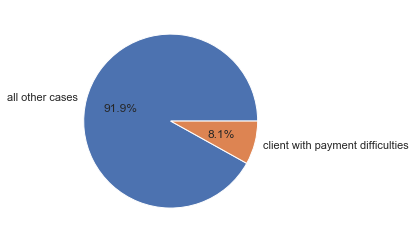

In [ ]:
import matplotlib.pyplot as plt

#ラベルづけ
label = ['all other cases', 'client with payment difficulties']

# 円グラフを表示
#TODO:実数を入れたい
plt.pie(df_train["TARGET"].value_counts(), autopct="%1.1f%%", labels = label)

plt.show()

コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。
    - 欠損値が多いため、データ処理、補填が必要
    - 返済可能な人の割合が大きい

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。


- 欠損値の扱いについて削除を行うか、補填を行うか
- データの文字列の扱いについて検討が必要（数値に置き換えるか、使用しないか、、）
- 欠損値がターゲットにどれだけ影響与えているのか？
- 返済可能か、返済不可能か判断するための重要な特徴量はどれになるのか
- テストデータから返済可能かを予測する





## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

まずはキャッチアップ。。。
散布図を作成してみる

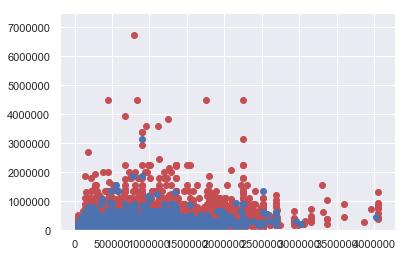

In [22]:
# 支払が困難なクライアントの収入
income_0 = df_train[df_train['TARGET'] == 0]['AMT_INCOME_TOTAL']
# それ以外のクライアントの収入
income_1 = df_train[df_train['TARGET'] == 1]['AMT_INCOME_TOTAL']

# 支払が困難なクライアントのクレジット額
credit_0 = df_train[df_train['TARGET'] == 0]['AMT_CREDIT']
# それ以外のクライアントのクレジット額
credit_1 = df_train[df_train['TARGET'] == 1]['AMT_CREDIT']

plt.ylim(0, 7500000)

# 支払が困難なクライアントの収入の散布図を出力(赤)
plt.scatter(credit_0, income_0, c="r", marker="o")

# それ以外のクライアントの収入の散布図を出力(青)
plt.scatter(credit_1, income_1, c="b", marker="o")

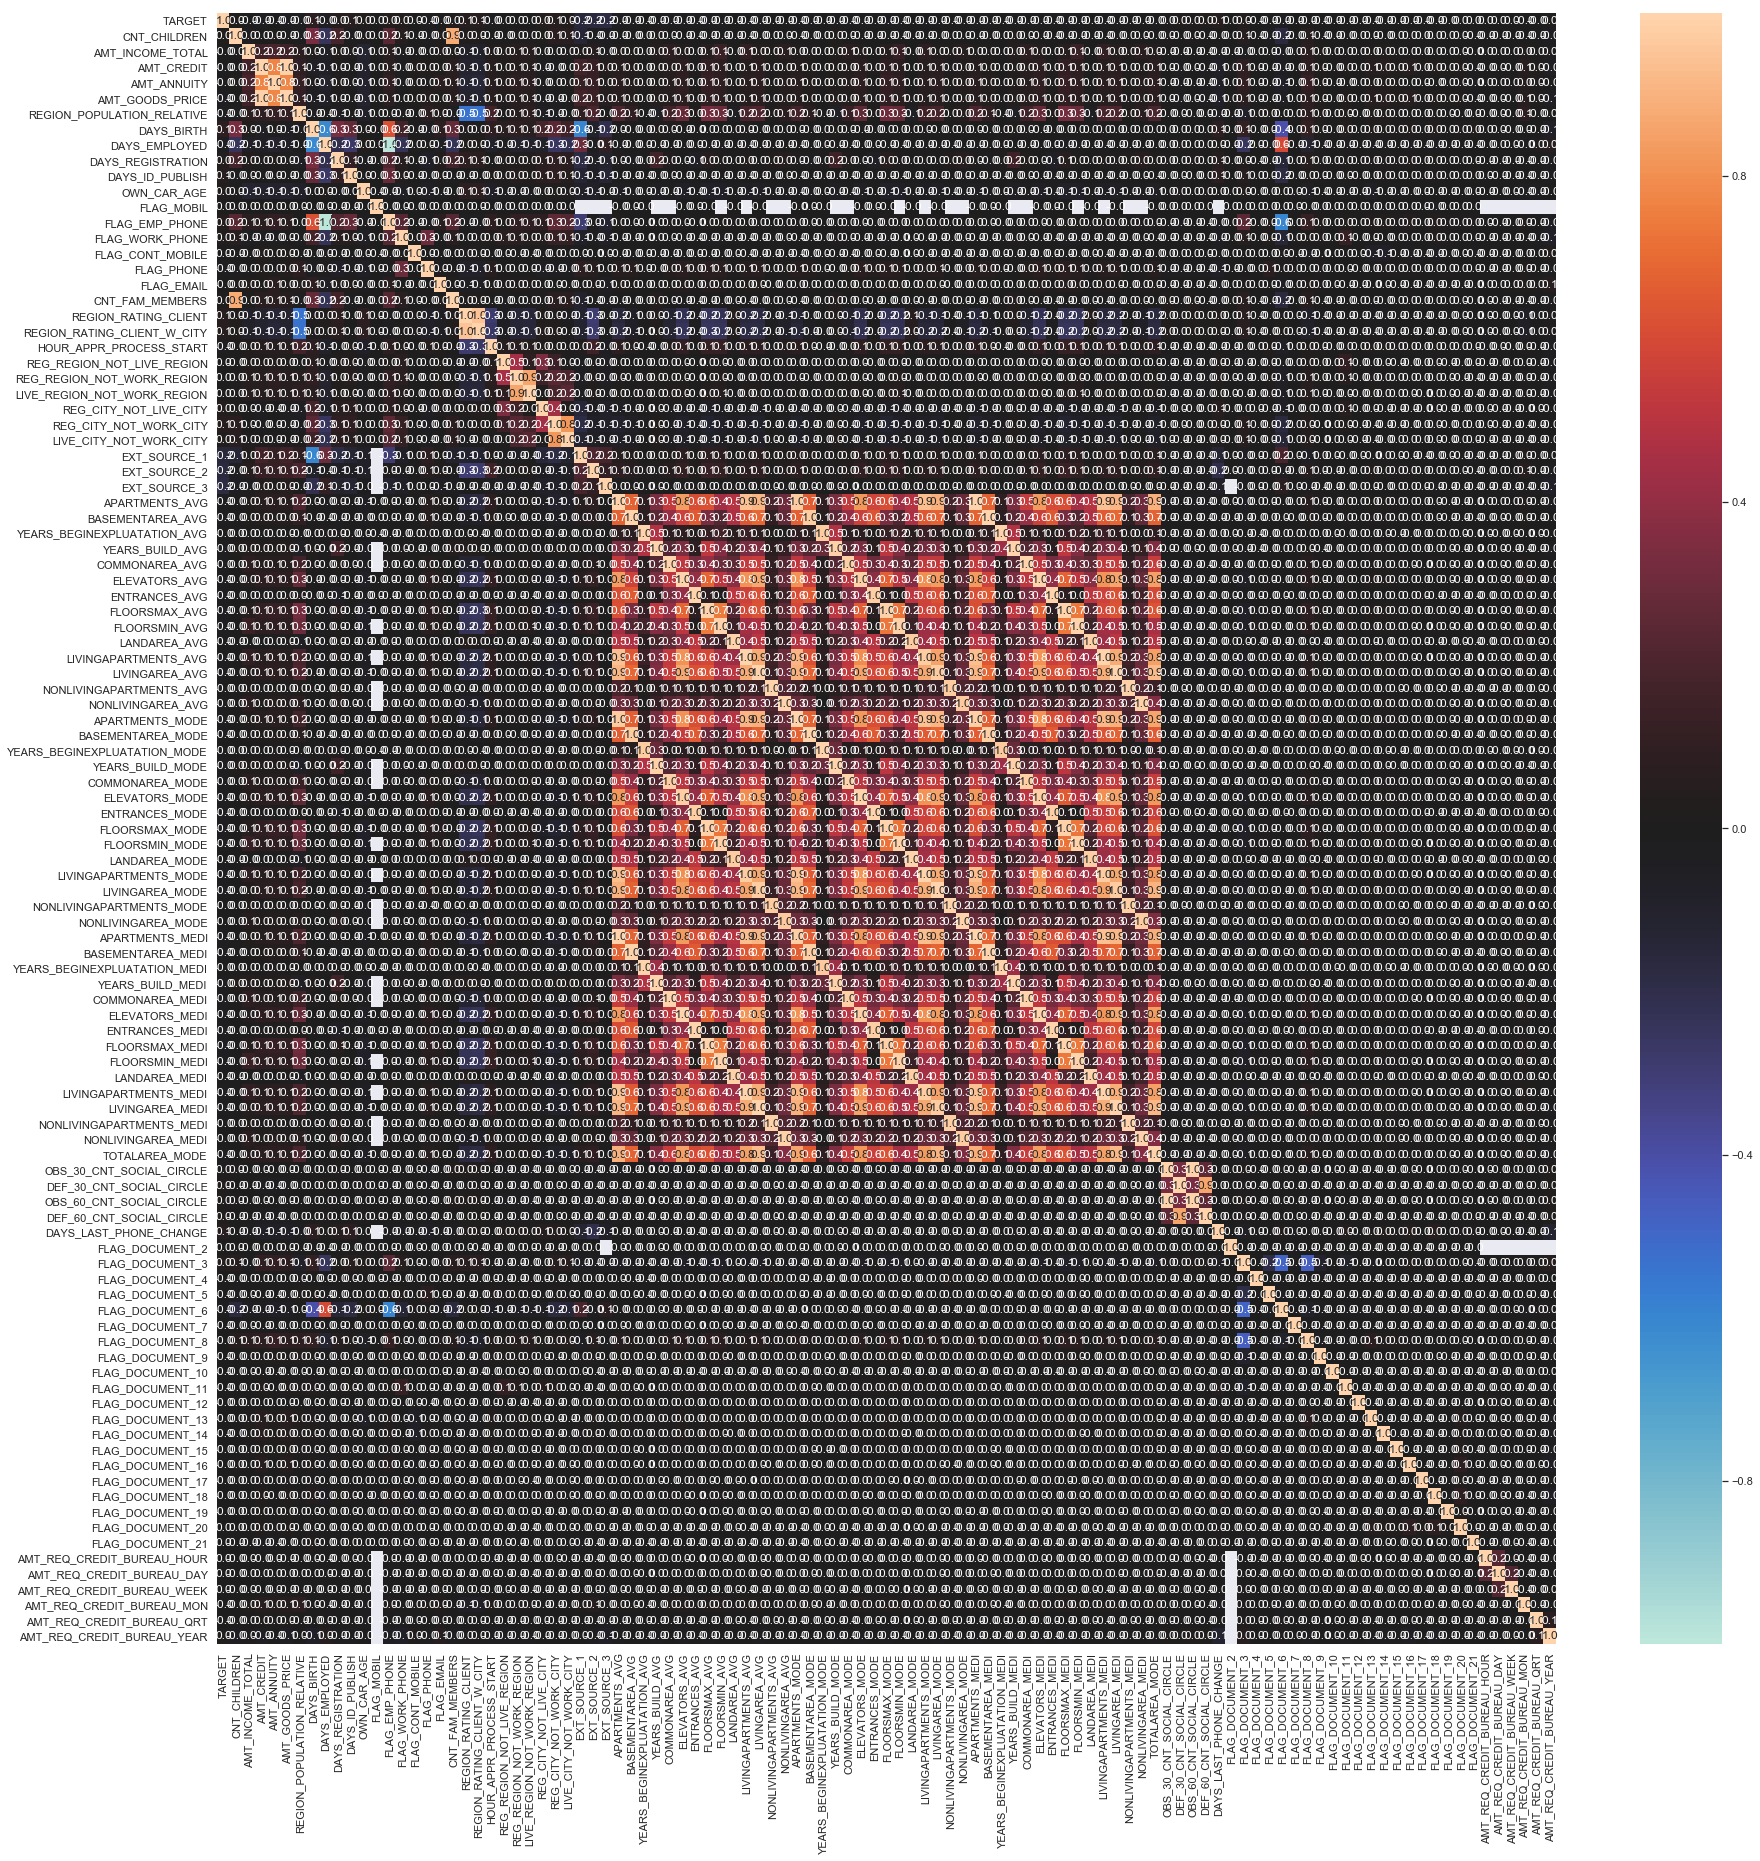

In [25]:
import seaborn as sns
sns.set()

corr_df_train = df_train.corr(method='pearson')

# ヒートマップ表示
sns.heatmap(
    corr_df_train,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    fmt='.1f',
    annot=True, # True:格子の中に値を表示
    xticklabels=corr_df_train.columns.values,
    yticklabels=corr_df_train.columns.values, 
)

